# The Spark Foundation task - 5

#### Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
#### As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
#####  Dataset link - https://bit.ly/34SRn3b




In [1]:
# First we are going to import all basic required library.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # to ignore warnings
%matplotlib inline

##### first dataset result

In [2]:
#importing dataset (matches.csv) using pandas

mdf = pd.read_csv('matches.csv')
mdf.head() #for display first 5 rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
mdf.tail() # for display last 5 rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


#### Preprocessing of the dataset - Matches.csv

In [4]:
mdf.shape #shape of the data

(756, 18)

In [5]:
#columns inside the dataset

mdf.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
mdf.info() #overall info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
# Checking the count of missing values in dataset


mdf.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
#dropping umpire3 column as it contain missing values. here total rows are 756
mdf = mdf.drop(columns=["umpire3"],axis=1)

mdf.head() # for display bfirst 5 rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [9]:
# now 7 missing values in 'city' and 4 in 'winner' & 'player_of_match' columns etc so now turn to deal with the missing values
    
mdf['city'].unique()  # to check the unique value in city colume

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [10]:
#finding column were cities are null 
mdf[mdf['city'].isnull()]['venue'] 

#As this data, we can see where the missing values all the matches with missing city was played at Dubai International Stadium.
#So, we can fill the missing values with the 'Dubai' city

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

In [11]:
#filling missing city in the column
mdf['city'].fillna('Dubai', inplace=True)

print('Done')

Done


In [12]:
# Now turn to deal with missing values 'winner' and 'Player of match'

mdf[mdf.winner.isnull()][['result','winner','player_of_match']]


#Here we can see that missing value of WINNER & Player_of_match corresponds with the result column there is no result of match, so we can not remove anything.

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


###### Here we can see that missing value of WINNER & Player_of_match corresponds with the result column there is no result of match, so we can not remove anything.

In [13]:
#now turn to deal with missing values of 'umpire1' & 'umpirer2'

#finding column were umpire1 is null
mdf[mdf['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [14]:
# in above cell, we can see umpire1 & umpire 2 both are having null values and need to deal with this

#umpire1 result
mdf[(mdf['team1']=='Royal Challengers Bangalore') & (mdf['team2']=='Delhi Daredevils') & (mdf['toss_winner']=='Royal Challengers Bangalore') & (mdf['toss_decision']=='bat')][['umpire1','umpire2']]

,umpire1,umpire2
4,NaN,NaN
54,CK Nandan,C Shamshuddin
128,S Asnani,BG Jerling


In [15]:
#umpire2 result
mdf[(mdf['team1']=='Sunrisers Hyderabad') & (mdf['city']=='Visakhapatnam')][['umpire1','umpire2']]

,umpire1,umpire2
528,PG Pathak,S Ravi
536,RK Illingworth,VA Kulkarni
612,S Ravi,C Shamshuddin
615,CB Gaffaney,VK Sharma
753,NaN,NaN


In [16]:
#filling data in missing place

mdf.loc[4, 'umpire1'] = 'CK Nandan'
mdf.loc[4, 'umpire2'] = 'C Shamshuddin'

mdf.loc[753, 'umpire1'] = 'CB Gaffaney'
mdf.loc[753, 'umpire2'] = 'VK Sharma'

In [17]:
# Number of unique values in each columns

for i in mdf.columns:
    print(i,len(mdf[i].unique()))

id 756
season 12
city 33
date 546
team1 15
team2 15
toss_winner 15
toss_decision 2
result 3
dl_applied 2
winner 16
win_by_runs 89
win_by_wickets 11
player_of_match 227
venue 41
umpire1 61
umpire2 65


In [18]:
#printing all the city hosted Indian premiere league matches

sorted(mdf['city'].unique())

['Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Dubai',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam']

In [19]:
#Bengaluru and Bangalore both are in the data when they are same. So we need merge them


#changing Bengaluru to Bangalore
mdf['city'] = mdf['city'].replace('Bengaluru', 'Bangalore')

print('Done')

Done


In [20]:
#printing all the team played Indian premiere league
sorted(mdf['team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [21]:
#here we can see rising pune we need to merge

mdf['team1'] = mdf['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

print('Done')

Done


In [22]:
# Now turn to check with team2

sorted(mdf['team2'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [23]:
#statistical overview of data
mdf.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Second dataset result

In [24]:
#importing dataset (deliveries.csv) using pandas

ddf = pd.read_csv('deliveries.csv')
ddf.head() #for display first 5 rows

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [25]:
ddf.tail() # for display last 5 rows

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [26]:
ddf.shape #shape of the data

(179078, 21)

In [27]:
#columns inside the dataset

ddf.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [28]:
ddf.info() #overall information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [29]:
# Checking the count of missing values in dataset


ddf.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

##### Here is the last three columns a lot of missing values and we have justified below points:

###### 1. Players can not be dismiss every ball when the player is not out on any given ball. SO columns must be missing.
###### 2. Dismissal_kind and fielder columns consists more missing values because a fielder can't be involve in every dismissal.

In [30]:
#statistical overview of second dataframe
ddf.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [31]:
#this is the complete frame of both dataframe
frames = [mdf, ddf]
  
result = pd.concat(frames)
result.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1.0,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2017.0,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2017.0,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2017.0,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2017.0,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Now turn for Data visualization

In [32]:
#category - wise analysis 
result['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

C:\Users\ankus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Teams with total number of wins')

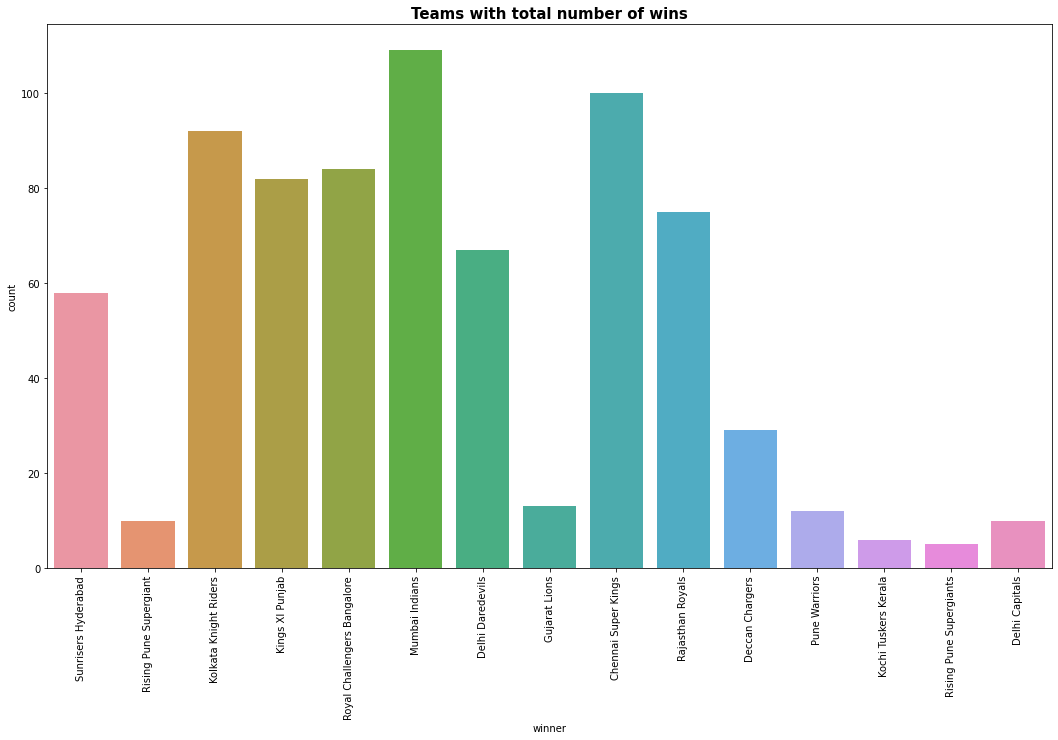

In [33]:
plt.figure(figsize=(18,10))
sns.countplot(result['winner'])
plt.xticks(rotation=90)
plt.style.use('dark_background')
plt.title('Teams with total number of wins',fontsize=15,fontweight='bold')

C:\Users\ankus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Matches played in Season')

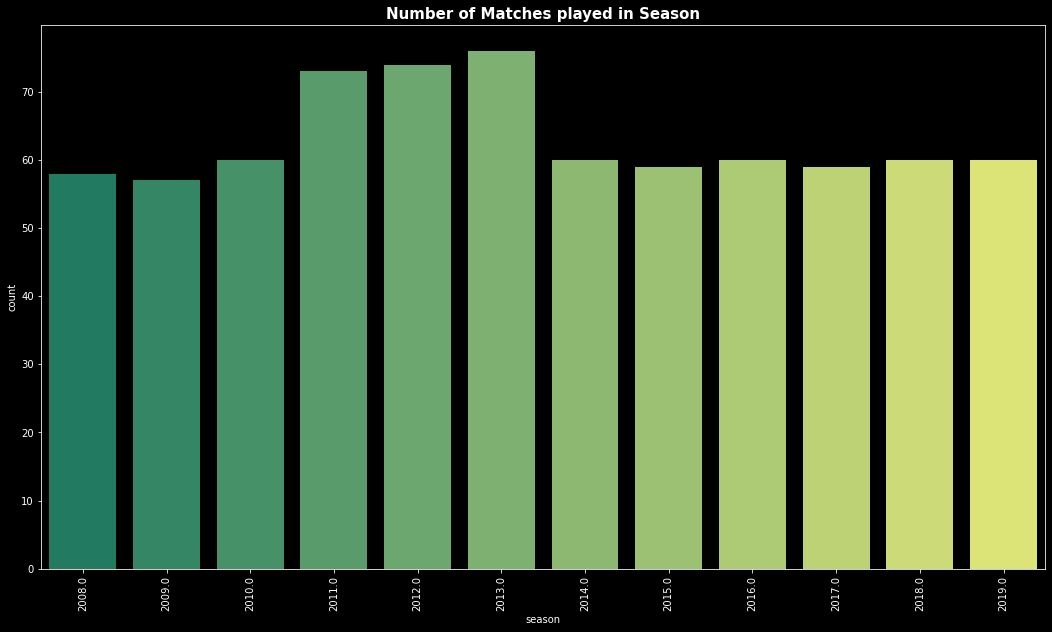

In [34]:
#plotting graph for matches played in each season of IPL
plt.figure(figsize=(18,10))
sns.countplot(result['season'], palette='summer')
plt.xticks(rotation=90)
plt.title('Number of Matches played in Season',fontsize=15,fontweight='bold')

C:\Users\ankus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of stadiums in different cities')

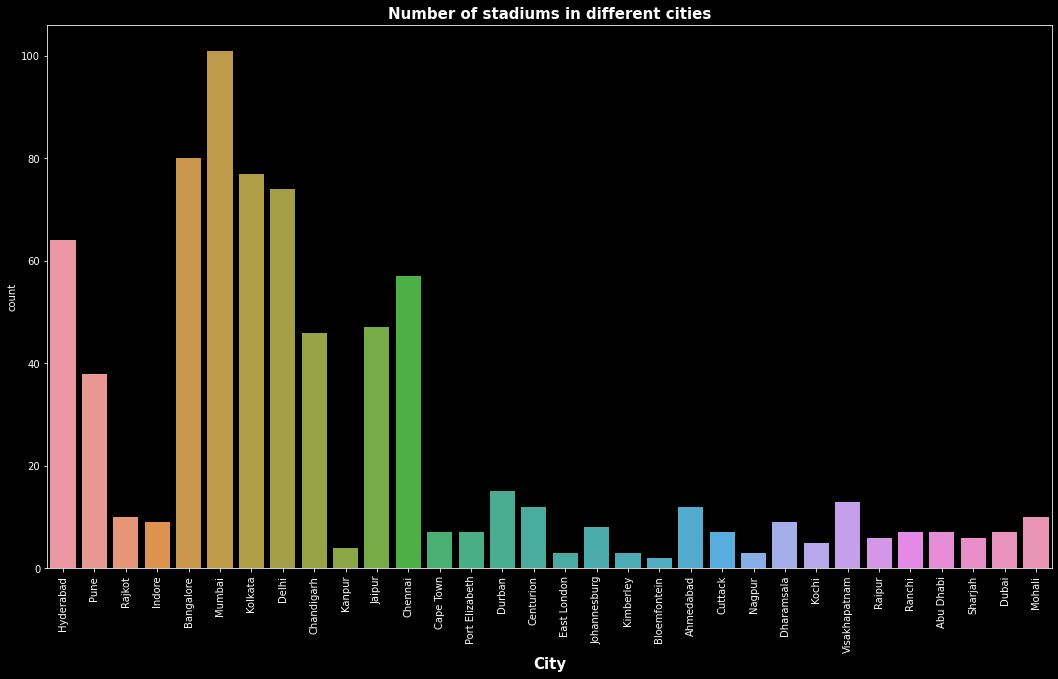

In [35]:
#plotting graph for number of stadiom in different cities
plt.figure(figsize=(18,10))
sns.countplot(result['city'])
plt.xticks(rotation=90)
plt.xlabel('City', fontsize=15, fontweight='bold')
plt.title('Number of stadiums in different cities',fontsize=15,fontweight='bold')

Text(0.5, 1.0, 'Season wise toss decision ')

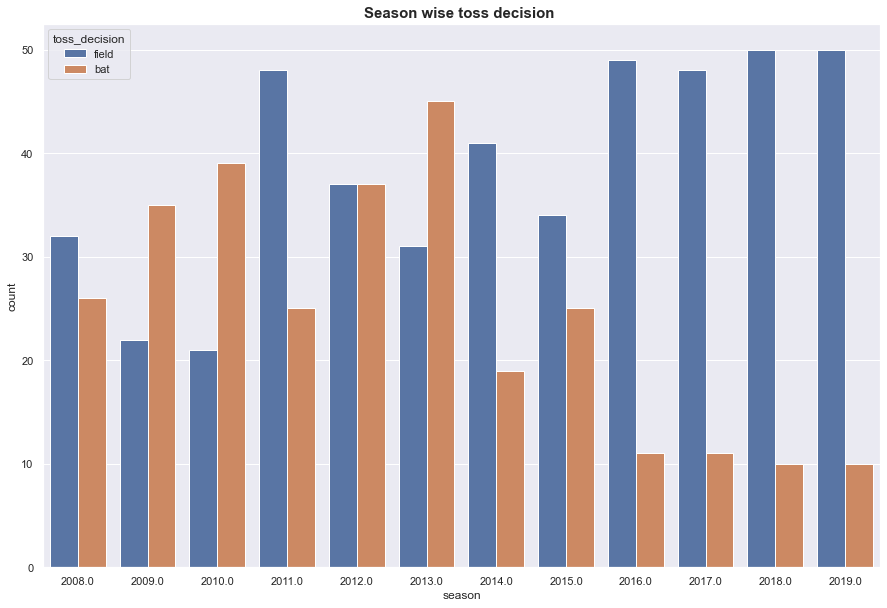

In [36]:
#plotting graph between season and toss_decision
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x=result['season'], hue=result['toss_decision'])
plt.title('Season wise toss decision ',fontsize=15,fontweight='bold')

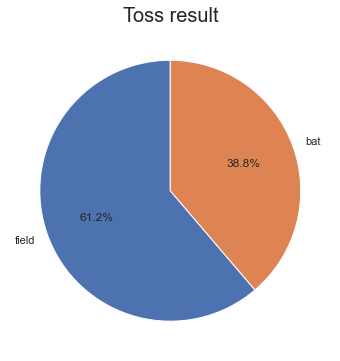

Around 60% times captain took decision field after winning the toss


In [37]:
# we will plot pie chart on Toss decision
Toss=result.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
plt.figure(figsize = (8,6))
plt.pie(sizes, labels=labels,
        autopct='%2.1f%%',startangle=90)
plt.title('Toss result',fontsize=20)
plt.show()

print('Around 60% times captain took decision field after winning the toss')

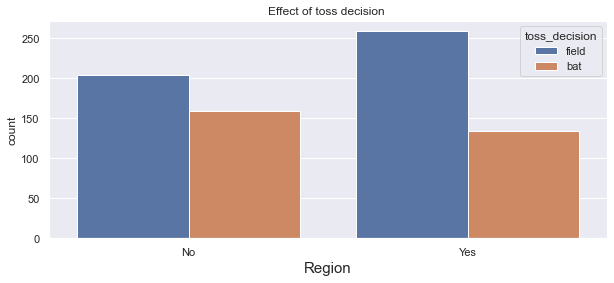

when teams winning the tosses and choose field have won matches most of the times. 


In [38]:
result['toss_win_game_win'] = np.where((result.toss_winner == result.winner),'Yes','No')
plt.figure(figsize=(10,4))
sns.countplot(x=result['toss_win_game_win'], hue=result['toss_decision'])
plt.title('Effect of toss decision ')
plt.xlabel('Region',fontsize=15)
plt.show()
print('when teams winning the tosses and choose field have won matches most of the times. ')

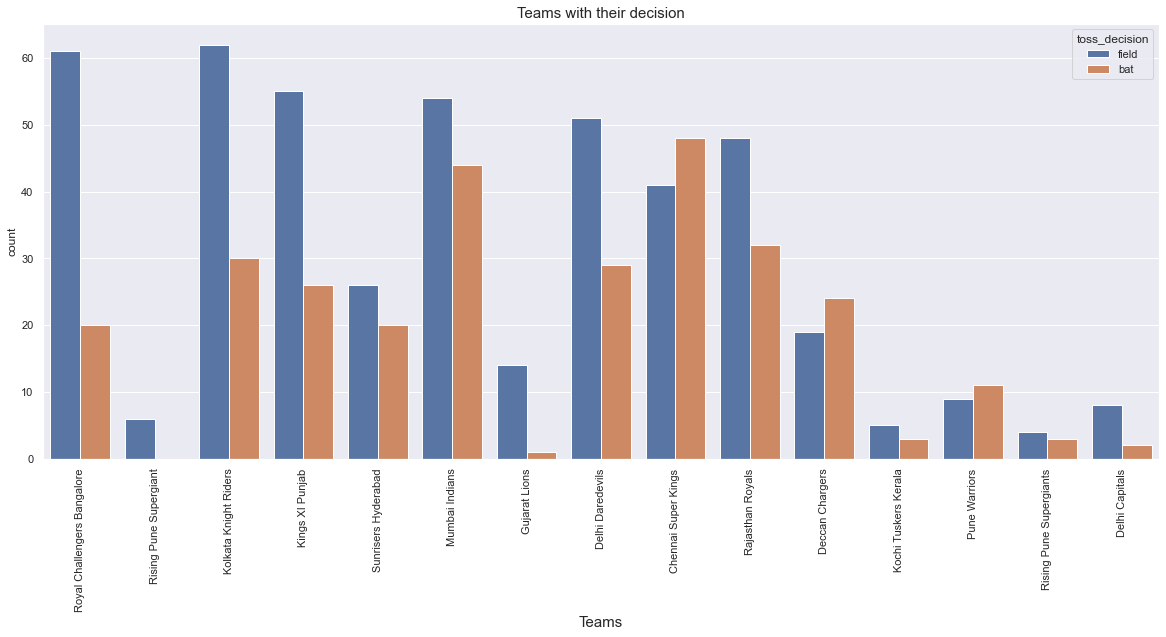

Most of the teams choose field first after winning the toss except PUNE WARRIORS & CHENNAI SUPER KINGS


In [39]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x=result['toss_winner'], hue=result['toss_decision'])
plt.title('Teams with their decision', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Teams',fontsize=15)
plt.show()
print('Most of the teams choose field first after winning the toss except PUNE WARRIORS & CHENNAI SUPER KINGS')

C:\Users\ankus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


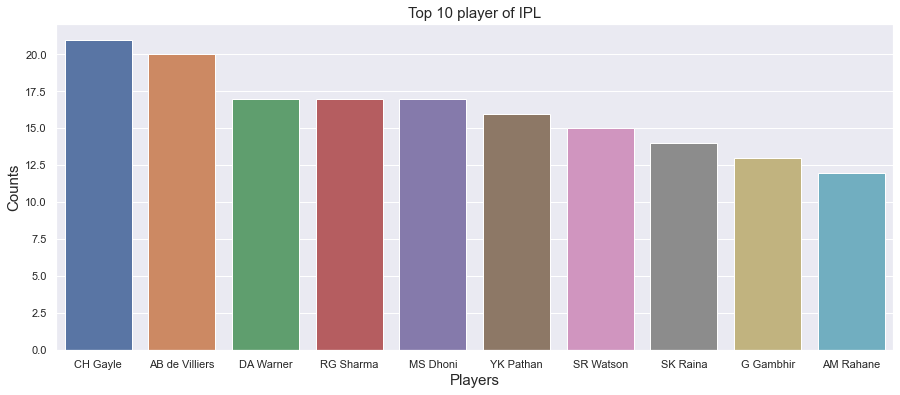

In [40]:
# All the top 10 batsman according to the match result
plt.figure(figsize=(15,6))
sns.barplot(result['player_of_match'].value_counts()[:10].index,result['player_of_match'].value_counts()[:10].values)
plt.title('Top 10 player of IPL',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xlabel('Players',fontsize=15)
plt.show()

In [41]:
# we will print winner season wise
final=result.drop_duplicates(subset=['season'], keep='last')

final[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008.0,Rajasthan Royals
2,2009.0,Deccan Chargers
3,2010.0,Chennai Super Kings
4,2011.0,Chennai Super Kings
5,2012.0,Kolkata Knight Riders
6,2013.0,Mumbai Indians
7,2014.0,Kolkata Knight Riders
8,2015.0,Mumbai Indians
9,2016.0,Sunrisers Hyderabad
0,2017.0,Mumbai Indians


In [42]:
# we will print number of season won by teams
final["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

Text(0, 0.5, 'Total Runs Scored')

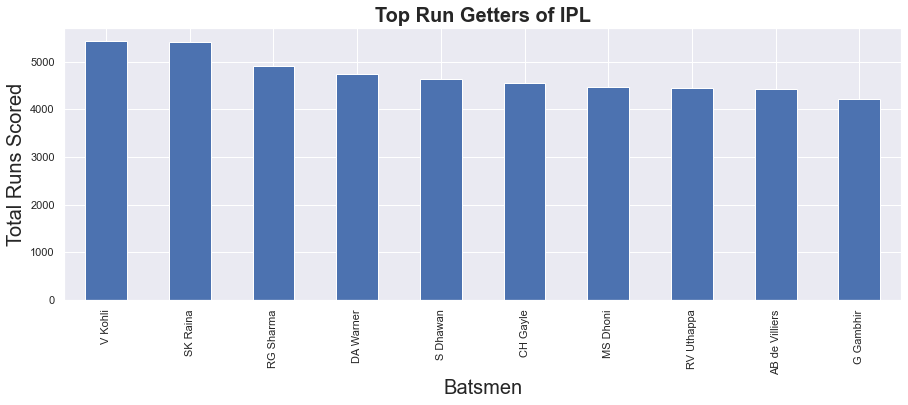

In [43]:
# All the top 10 batsman according to the match result
result.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 20)
plt.ylabel("Total Runs Scored", size = 20)

Text(0, 0.5, 'Total Wickets Taken')

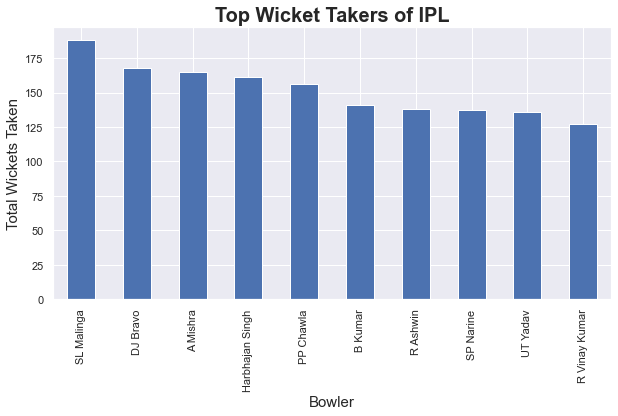

In [44]:
#this is the graph of top 10 bowler amd wicket taker
result.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False)[:10].plot(kind = 'bar',figsize=(10,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 15)
plt.ylabel("Total Wickets Taken", size = 15)

In [45]:
#we will print number of 6 hit by team
six=result[result['batsman_runs']==6]
six.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838.0,973
Deccan Chargers,2400.0,400
Delhi Capitals,522.0,87
Delhi Daredevils,4806.0,801
Gujarat Lions,930.0,155
Kings XI Punjab,5856.0,976
Kochi Tuskers Kerala,318.0,53
Kolkata Knight Riders,5580.0,930
Mumbai Indians,6576.0,1096


In [46]:
# we will print numbers of fours hit by team
four=result[result['batsman_runs']==4]
four.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772.0,2193
Deccan Chargers,3828.0,957
Delhi Capitals,968.0,242
Delhi Daredevils,8632.0,2158
Gujarat Lions,1840.0,460
Kings XI Punjab,9832.0,2458
Kochi Tuskers Kerala,680.0,170
Kolkata Knight Riders,9736.0,2434
Mumbai Indians,10352.0,2588


In [56]:
# we will print no of matches played by batsman
player= result[["match_id","player_dismissed"]]
player =player.groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
player.columns=["batsman","No_of Matches"]
player[:10]

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
5,G Gambhir,136
6,KD Karthik,135
7,PA Patel,126
8,AM Rahane,116
9,AT Rayudu,115


C:\Users\ankus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


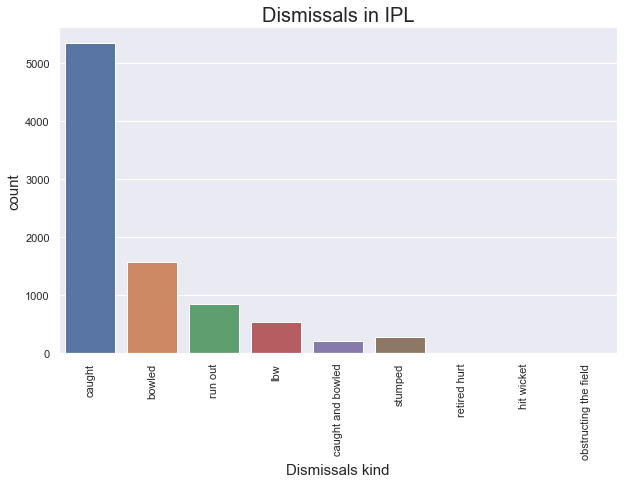

In [49]:
# Dismissals in IPL
plt.figure(figsize=(10,6))
ax=sns.countplot(result.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [50]:
#top 10 bowler of dot balls

bow = result.bowler[result.total_runs==0].value_counts()[:10]
bow

Harbhajan Singh    1244
SL Malinga         1144
B Kumar            1116
A Mishra           1108
PP Chawla          1100
P Kumar            1075
R Ashwin           1067
SP Narine          1038
DW Steyn            996
UT Yadav            942
Name: bowler, dtype: int64

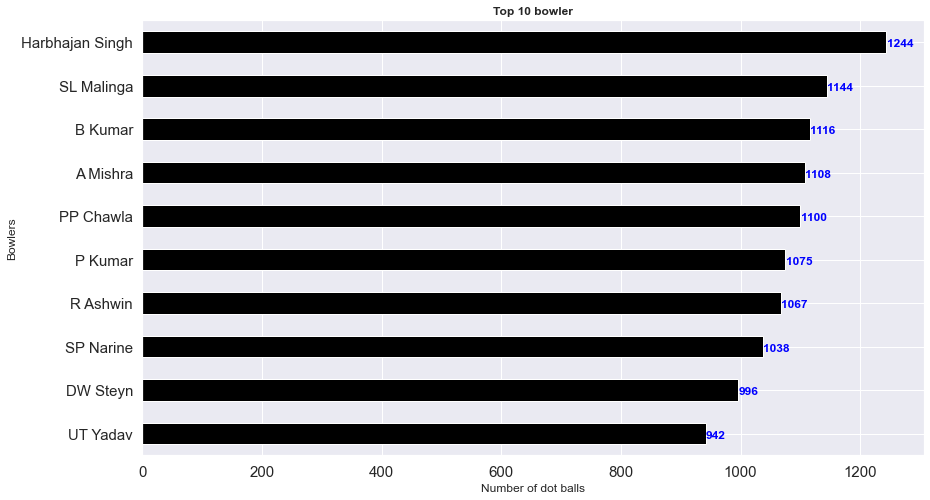

In [51]:
bow = bow.plot(kind='barh',figsize=(14,8),color='black',fontsize=15)
bow.set_title('Top 10 bowler',fontweight='bold')
bow.set_xlabel('Number of dot balls')
bow.set_ylabel('Bowlers')
bow.invert_yaxis()

for i in bow.patches:
    bow.text(i.get_width()+.35,i.get_y()+.35,i.get_width(),fontweight='bold',color='blue')

In [58]:
#Harbhajan singh holdas the record of most dot ball.

#top 10 fielders

field=result['fielder'].value_counts()[:10]
field

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
NV Ojha            82
Name: fielder, dtype: int64

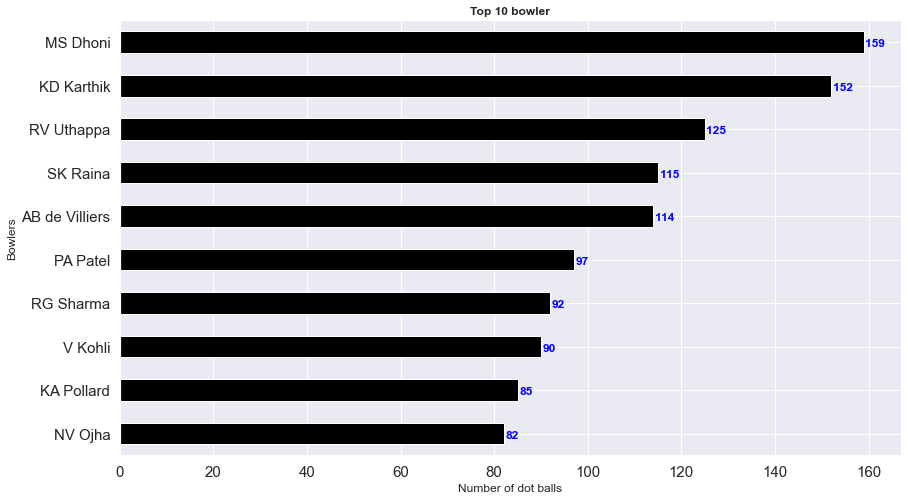

In [59]:
field = field.plot(kind='barh',figsize=(14,8),color='black',fontsize=15)
field.set_title('Top 10 bowler',fontweight='bold')
field.set_xlabel('Number of Dismissal')
field.set_ylabel('Fielders')
field.invert_yaxis()

for i in field.patches:
    field.text(i.get_width()+.35,i.get_y()+.35,i.get_width(),fontweight='bold',color='blue')

In [74]:
# MS Dhoni involves in most number(150) as a fielder.

#let's check the top 10 venue details which hosted most number of matches


host=result.groupby('venue')['city'].value_counts().sort_values(ascending=False)[:10]

host


venue                                       city      
Eden Gardens                                Kolkata       77
Wankhede Stadium                            Mumbai        73
M Chinnaswamy Stadium                       Bangalore     73
Feroz Shah Kotla                            Delhi         67
Rajiv Gandhi International Stadium, Uppal   Hyderabad     56
MA Chidambaram Stadium, Chepauk             Chennai       49
Sawai Mansingh Stadium                      Jaipur        47
Punjab Cricket Association Stadium, Mohali  Chandigarh    35
Maharashtra Cricket Association Stadium     Pune          21
Subrata Roy Sahara Stadium                  Pune          17
Name: city, dtype: int64

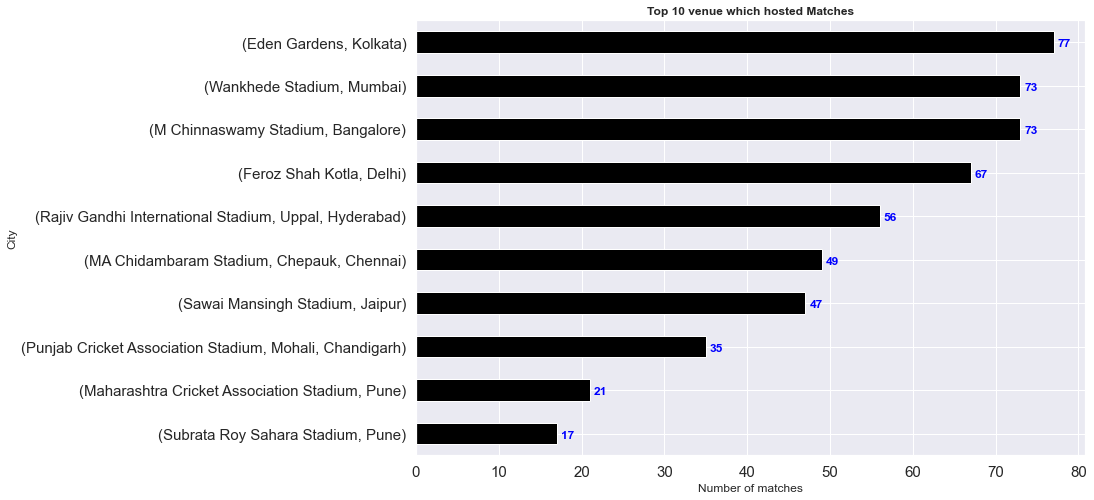

In [75]:
host = host.plot(kind='barh',figsize=(12,8),color='black',fontsize=15)
host.set_title('Top 10 venue which hosted Matches',fontweight='bold')
host.set_xlabel('Number of matches')
host.set_ylabel('City')
host.invert_yaxis()

for i in host.patches:
    host.text(i.get_width()+.5,i.get_y()+.35,i.get_width(),fontweight='bold',color='blue')

In [76]:
# Eden garden of kolkata holds the record for hosting the number of matches

#now turn to check match results

match = result['result'].value_counts()
match

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [77]:
# checking super overs

superover=result['is_super_over'].value_counts()
superover

0.0    178997
1.0        81
Name: is_super_over, dtype: int64

In [78]:
#let's replace the '1' as a 'yes' & '0' for 'No' for better analysis

superover=result['is_super_over'].replace(to_replace=1, value='yes',inplace=True)
supweover=result['is_super_over'].replace(to_replace=0, value='no',inplace=True)

In [79]:
#again we are goiung to check super over 
# checking super overs

superover=result['is_super_over'].value_counts()
superover


no     178997
yes        81
Name: is_super_over, dtype: int64

In [80]:
#only the 81 times super over is happend according to this dataset

print('Thank you guys')

Thank you guys


# Report :

#### Teams & Factors
1. The highest number of match won by Mumbai Indians and has won the most number of toss.
2. After winning toss more teams decide to do fielding first.
3. Teams which Bowl first has higher chances of winning then the team which bat first.
4. The Mumbai city has hosted the most number of IPL matches.
5. Eden Gardens has hosted the maximum number of IPL matches
6. All other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.
7. 10 teams played in 2011 and 9 teams each in 2012 and 2013
8. Most teams field first after winning toss except for Chennai Super Kings who has mostly opted to bat first. Deccan Chargers and Pune Warriors also show the same trend.
9. According this dataset 9 times match has tie result
10. Super over value is 81 times.
11. caught ball is the most dismissals in IPL
12. Maximum number of four & six hit by team Chennai Super Kings
13. Total 14 teams participated in 2008-2019 out of which only 6 teams manged to win the IPL title.


#### Player

1. Chris Gayle has won the maximum number of player of the match title.
2. The highest number of six hit by player is CH gayle.
3. Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma
4. Dismissals in IPL was most by Catch out 
5. S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.
6. The highest number of matches played by player name are SK Raina, RG Sharma
7. Malinga has taken the most number of wickets in IPL
8. H. singh holds the record of most dot balls.
9. From the top 3 player analysis Suresh Raina is most consistant player.
10. M. S Dhoni involves in most number of dismissal as fielder by KD Karthik And RV utappa.


#### Over-all conclusion

###### Good in batsman  - V Kohli, S Raina, Rohit Sharma , David Warner etc
###### Game changer batsman - Chris Gayle, AB deVillers, R Sharma , MS Dhoni etc
###### Best finisher - CH Gayle,KA Pollard, DA Warner,SR Watson,BB McCullum etc
###### Well experience bowler - Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo etc
###### Wicket taker - Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla


# Thank you 